In [33]:
import pickle
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from Utility import lorenz_curve,gini

pd.options.display.float_format = "{:,.2f}".format

In [34]:
## 
slides = True

In [35]:
## figure plotting configurations


plt.style.use('seaborn')
plt.rcParams["font.family"] = "Times New Roman" #'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['axes.labelweight'] = 'bold'


if slides == False:
    ## Set the 
    plt.rc('font', size=25)
    # Set the axes title font size
    plt.rc('axes', titlesize=20)
    # Set the axes labels font size
    plt.rc('axes', labelsize=20)
    # Set the font size for x tick labels
    plt.rc('xtick', labelsize=20)
    # Set the font size for y tick labels
    plt.rc('ytick', labelsize=20)
    # Set the legend font size
    plt.rc('legend', fontsize=20)
    # Set the font size of the figure title
    plt.rc('figure', titlesize=20)
    
else:
    ## Set the 
    plt.rc('font', size=30)
    # Set the axes title font size
    plt.rc('axes', titlesize=30)
    # Set the axes labels font size
    plt.rc('axes', labelsize=30)
    # Set the font size for x tick labels
    plt.rc('xtick', labelsize=30)
    # Set the font size for y tick labels
    plt.rc('ytick', labelsize=30)
    # Set the legend font size
    plt.rc('legend', fontsize=30)
    # Set the font size of the figure title
    plt.rc('figure', titlesize=40)

In [36]:
## parameters needed for plot

T = 40

h2m_cut_off = 0.5

In [26]:
## 
def h2m_ratio(a_grid,
              a_pdfs,
              cutoff):
    """
    input
    =====
    a_grid: an array of a grid: asset to permanent income ratio
    a_pdfs: an array of probabilities associated with these grids that sum up to one
    cutoff: the cutoff ratio for hands-to-month consumers, i.e. asset to income ratio below the cutooff is h2m
    
    output
    ======
    h2m_share: scalar indicating the share of h2m
    """
    h2m_where = np.where(a_grid<=cutoff)
    h2m_share = a_pdfs[h2m_where].sum()

    return h2m_share 

In [27]:
## get the wealth distribution from SCF (net worth)

SCF2016 = pd.read_stata('rscfp2016.dta')
SCF2016 = SCF2016.drop_duplicates(subset=['yy1'])
SCF_wealth, SCF_weights = np.array(SCF2016['networth']), np.array(SCF2016['wgt'])

## wealth 2 income ratio 

SCF2016['w2income'] = SCF2016['networth']/ SCF2016['norminc']
SCF_w2inc, SCF_w2incweights = np.array(SCF2016['w2income']), np.array(SCF2016['wgt'])

## liquid net wealth
SCF2016['lqwealth'] =  SCF2016['liq']- SCF2016['ccbal']
SCF_lqwealth, SCF_lqweights = np.array(SCF2016['lqwealth']), np.array(SCF2016['wgt'])

## liquid wealth 2 income ratio

SCF2016['lw2income'] = SCF2016['lqwealth']/ SCF2016['norminc']
SCF_lqw2inc, SCF_lqw2incweights = np.array(SCF2016['w2income']), np.array(SCF2016['wgt'])


## get the lorenz curve weights from SCF 
SCF_wealth_sort_id = SCF_wealth.argsort()
SCF_wealth_sort = SCF_wealth[SCF_wealth_sort_id]
SCF_weights_sort = SCF_weights[SCF_wealth_sort_id]
SCF_weights_sort_norm = SCF_weights_sort/SCF_weights_sort.sum()

SCF_share_agents_ap, SCF_share_ap = lorenz_curve(SCF_wealth_sort,
                                                 SCF_weights_sort_norm,
                                                 nb_share_grid = 200)

## get the lorenz curve weights of liquid wealth from SCF 
SCF_lqwealth_sort_id = SCF_lqwealth.argsort()
SCF_lqwealth_sort = SCF_lqwealth[SCF_lqwealth_sort_id]
SCF_lqweights_sort = SCF_lqweights[SCF_lqwealth_sort_id]
SCF_lqweights_sort_norm = SCF_lqweights_sort/SCF_lqweights_sort.sum()

SCF_lq_share_agents_ap, SCF_lq_share_ap = lorenz_curve(SCF_lqwealth_sort,
                                                 SCF_lqweights_sort_norm,
                                                 nb_share_grid = 200)

## get the weights of wealth to income ratio from SCF

SCF_w2inc_sort_id = SCF_w2inc.argsort()
SCF_w2inc_sort = SCF_w2inc[SCF_w2inc_sort_id]
SCF_w2incweights_sort = SCF_w2incweights[SCF_w2inc_sort_id]
SCF_w2incweights_sort_norm = SCF_w2incweights_sort/SCF_w2incweights_sort.sum()



## get the weights of wealth to income ratio from SCF

SCF_lqw2inc_sort_id = SCF_lqw2inc.argsort()
SCF_lqw2inc_sort = SCF_lqw2inc[SCF_w2inc_sort_id]
SCF_lqw2incweights_sort = SCF_lqw2incweights[SCF_w2inc_sort_id]
SCF_lqw2incweights_sort_norm = SCF_lqw2incweights_sort/SCF_lqw2incweights_sort.sum()


## gini 

gini_SCF = gini(SCF_share_agents_ap,
                 SCF_share_ap)

gini_lq_SCF = gini(SCF_lq_share_agents_ap,
                 SCF_lq_share_ap)


## age profile 

SCF_profile = pd.read_pickle('data/SCF_age_profile.pkl')

SCF_profile['mv_wealth'] = SCF_profile['av_wealth'].rolling(3).mean()
SCF_profile['mv_lqwealth'] = SCF_profile['av_lqwealth'].rolling(3).mean()

In [76]:
model_names =['baseline',
             #'SLPR',
             #'LPR',
             #'HG',
             #'SDPR',
             #'SSDPR',
             #'HPR',
             'HPRUR',
             'SHPRUR',
              #'HPRG',
             #'HPRURG',
             #'HPRURTP',
             #'SHPR',
             #'HTP'
             ]

#
figure_name = '_SHPRUR'

/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_24479/3280228530.py:84: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),
/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_24479/3280228530.py:136: RuntimeWarning: invalid value encountered in log
  np.log(model_solution['A_life'])[:-1]+scale_adjust,
/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_24479/3280228530.py:136: RuntimeWarning: invalid value encountered in log
  np.log(model_solution['A_life'])[:-1]+scale_adjust,
/var/folders/39/ks6jc__9375c2fl7h7pwq5jh0000gn/T/ipykernel_24479/3280228530.py:167: RuntimeWarning: invalid value encountered in log
  ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),


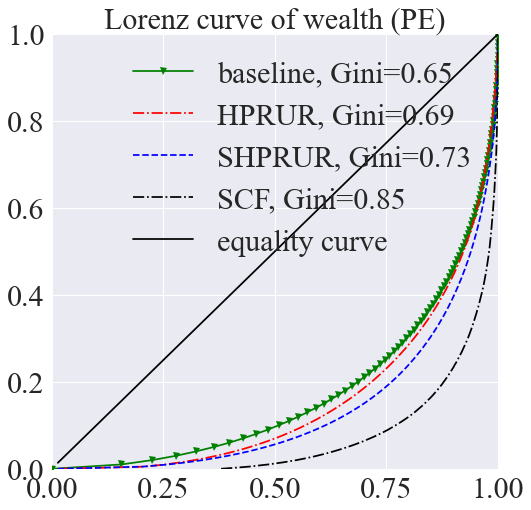

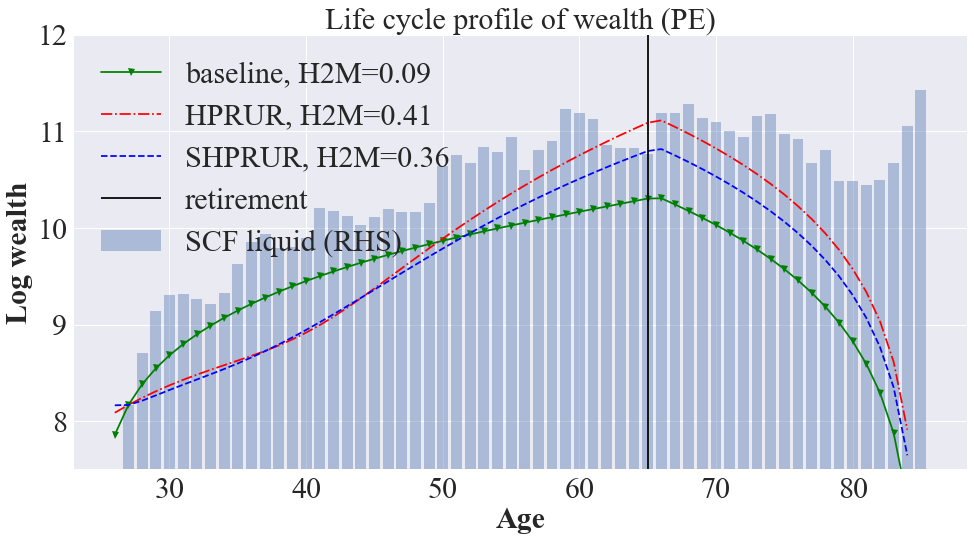

In [ ]:
## plot results from different models

line_patterns =['g-v',
                'r-.',
                'b--',
                'k.',
                'm',
                'c-.'
                ]

## Lorenz curve of steady state wealth distribution

fig, ax = plt.subplots(figsize=(8,8))
for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    ax.plot(model_solution['share_agents_ap'],
            model_solution['share_ap'],
            line_patterns[k],
            label = model_name+', Gini={:.2f}'.format(model_solution['gini']))
ax.plot(SCF_share_agents_ap,
        SCF_share_ap, 'k-.',
        label='SCF, Gini={:.2f}'.format(gini_SCF))
ax.plot(model_solution['share_agents_ap'],
        model_solution['share_agents_ap'], 
        'k-',
        label='equality curve')
ax.set_title('Lorenz curve of wealth (PE)')
ax.legend(loc=1)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig('../Graphs/model/lorenz_a_compare_pe'+figure_name+'.pdf')


## life cycle

age_lc = SCF_profile.index

fig, ax = plt.subplots(figsize=(16,8))
plt.title('Life cycle profile of wealth (PE)')

for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    
    ## h2m share 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    scale_adjust = np.log(np.array(SCF_profile['mv_lqwealth'])[2])-np.log(model_solution['A_life'][1])
    ## scale adjust computed by the initial difference in size of model and data 
    ax.plot(age_lc[1:-1],
           np.log(model_solution['A_life'][:-1])+scale_adjust,
           line_patterns[k],
           label= model_name+', H2M={:.2f}'.format(h2m_share))
ax.set_ylim([7.5,12])

ax.vlines(T+25,
          7.5,
          12,
          color='k',
          label='retirement'
         )
ax.bar(age_lc[1:],
        np.log(SCF_profile['mv_lqwealth'][1:]),
          alpha = 0.4,
       label='SCF liquid (RHS)')
ax.set_xlabel('Age')
ax.set_ylabel('Log wealth')
ax.legend(loc=0)
fig.savefig('../Graphs/model/life_cycle_a_compare_pe'+figure_name+'.pdf')



## wealth distributions in pe

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wealth distribution (PE)')
for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    
    ## get h2m fraction: an arbitrary definition for now. a2p ratio smaller than 5 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),
            model_solution['ap_pdfs_dist'],
            label=model_name+', H2M={:.2f}'.format(h2m_share),
           alpha = 0.8)
ax.set_xlabel(r'$a$')
ax.legend(loc=0)
ax.set_xlim([-10,30])


ax.set_ylabel(r'$prob(a)$')

fig.savefig('../Graphs/model/distribution_a_compare_pe'+figure_name+'.pdf')


## lorenz curve in ge

fig, ax = plt.subplots(figsize=(8,8))
for k,model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ax.plot(model_solution['share_agents_ap'],
            model_solution['share_ap'],
            line_patterns[k],
            label = model_name+', Gini={:.2f}'.format(model_solution['gini']))

ax.plot(SCF_share_agents_ap,
        SCF_share_ap, 'k-.',
        label='SCF, Gini={:.2f}'.format(gini_SCF))
ax.plot(model_solution['share_agents_ap'],
        model_solution['share_agents_ap'], 
        'k-',
        label='equality curve')
ax.set_title('Lorenz curve of wealth (GE)')
ax.legend(loc=0)
plt.xlim([0,1])
plt.ylim([0,1])
fig.savefig('../Graphs/model/lorenz_a_compare_ge'+figure_name+'.pdf')


## life cycle profile in ge

fig, ax = plt.subplots(figsize=(16,8))

plt.title('Life cycle profile of wealth (GE)')

for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ## h2m share 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    scale_adjust = np.log(np.array(SCF_profile['mv_lqwealth'])[2])-np.log(model_solution['A_life'][1])
    ax.plot(age_lc[:-2],
            np.log(model_solution['A_life'])[:-1]+scale_adjust,
            line_patterns[k],
           label = model_name+', H2M={:.2f}'.format(h2m_share))
ax.set_ylim([7.5,12])
ax.vlines(T+25,
          7,
          12,
          color='k',
          label='retirement')
ax.bar(age_lc,
        np.log(SCF_profile['mv_lqwealth']),
       #'k--',
        alpha = 0.4,
       label='SCF liquid (RHS)')

ax.set_xlabel('Age')
ax.set_ylabel('Log wealth')
ax.legend(loc=0)
fig.savefig('../Graphs/model/life_cycle_a_compare_ge'+figure_name+'.pdf')


## wealth distributions in ge

fig, ax = plt.subplots(figsize=(8,6))
ax.set_title('Wealth distribution (GE)')
for k, model_name in enumerate(model_names):
    model_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ## get h2m fraction: an arbitrary definition for now. a2p ratio smaller than 5 
    h2m_share = h2m_ratio(model_solution['a_grid_dist'],
                          model_solution['a_pdfs_dist'],
                          h2m_cut_off)
    ax.plot(np.log(model_solution['ap_grid_dist']+1e-5),
            model_solution['ap_pdfs_dist'],
            label= model_name+', H2M={:.2f}'.format(h2m_share))
ax.set_xlabel(r'$a$')
ax.legend(loc=0)
ax.set_ylabel(r'$prob(a)$')
ax.set_xlim([-10,60])

fig.savefig('../Graphs/model/distribution_a_compare_ge'+figure_name+'.pdf')



In [30]:
## tablulate some results 

model_dicts = []

cutoffs = [0.1,0.3,0.5]


## SCF 

SCF_dict = {}
SCF_dict['Model'] = 'SCF (liquid)'
SCF_dict['Gini coeff'] = gini_SCF
for cutoff in cutoffs:
    h2m_share = h2m_ratio(SCF_lqw2inc_sort,
                          SCF_lqw2incweights_sort_norm,
                          cutoff)
    SCF_dict['H2M share ('+str(cutoff)+')'] = h2m_share

model_dicts.append(SCF_dict)

## model results 

for k,model_name in enumerate(model_names):
    ## PE 
    model_pe_solution = pickle.load(open('./model_solutions/'+ model_name+'_PE.pkl','rb'))
    this_model_pe_dict = {}
    this_model_pe_dict['Model'] = model_name+' (PE)'
    this_model_pe_dict['Gini coeff'] = model_pe_solution['gini']
    for cutoff in cutoffs:
        h2m_share = h2m_ratio(model_pe_solution['a_grid_dist'],
                              model_pe_solution['a_pdfs_dist'],
                              cutoff)
        this_model_pe_dict['H2M share ('+str(cutoff)+')'] = h2m_share
    model_dicts.append(this_model_pe_dict)
    
    
## GE
for k,model_name in enumerate(model_names):
    model_ge_solution = pickle.load(open('./model_solutions/'+ model_name+'_GE.pkl','rb'))
    ## GE
    this_model_ge_dict = {}
    this_model_ge_dict['Model'] = model_name+' (GE)'
    this_model_ge_dict['Gini coeff'] = model_ge_solution['gini']
    for cutoff in cutoffs:
        h2m_share = h2m_ratio(model_ge_solution['a_grid_dist'],
                              model_ge_solution['a_pdfs_dist'],
                              cutoff)
        this_model_ge_dict['H2M share ('+str(cutoff)+')'] = h2m_share
    model_dicts.append(this_model_ge_dict)
    
    
results_table = pd.DataFrame(model_dicts)


In [31]:
results_table

,Model,Gini coeff,H2M share (0.1),H2M share (0.3),H2M share (0.5)
0,SCF (liquid),0.85,0.18,0.26,0.31
1,baseline (PE),0.65,0.02,0.04,0.09
2,HPRURG (PE),0.72,0.17,0.29,0.43
3,baseline (GE),0.64,0.02,0.05,0.07
4,HPRURG (GE),0.63,0.08,0.13,0.16
